In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Loading Data

In [149]:
path = "C:/Users/rsama/Desktop/DS_Lab/Real estate valuation data set.xlsx"
df = pd.read_excel(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [150]:
# Renaming column for convenience
df.columns = ['No', 'X1_date', 'X2_age', 'X3_dist', 'X4_sto', 'X5_lat', 'X6_long', 'Y_pr']

In [151]:
# Checking Null Values 
df.isnull().sum()

No         0
X1_date    0
X2_age     0
X3_dist    0
X4_sto     0
X5_lat     0
X6_long    0
Y_pr       0
dtype: int64

In [152]:
# Changing X1_date to duration of txn from the oldest txn date 
#(older txn dates have less value while the recent ones have higher value)
df['X1_txn'] = df['X1_date'] - df['X1_date'].min()

# Univariate and Correlation Analysis

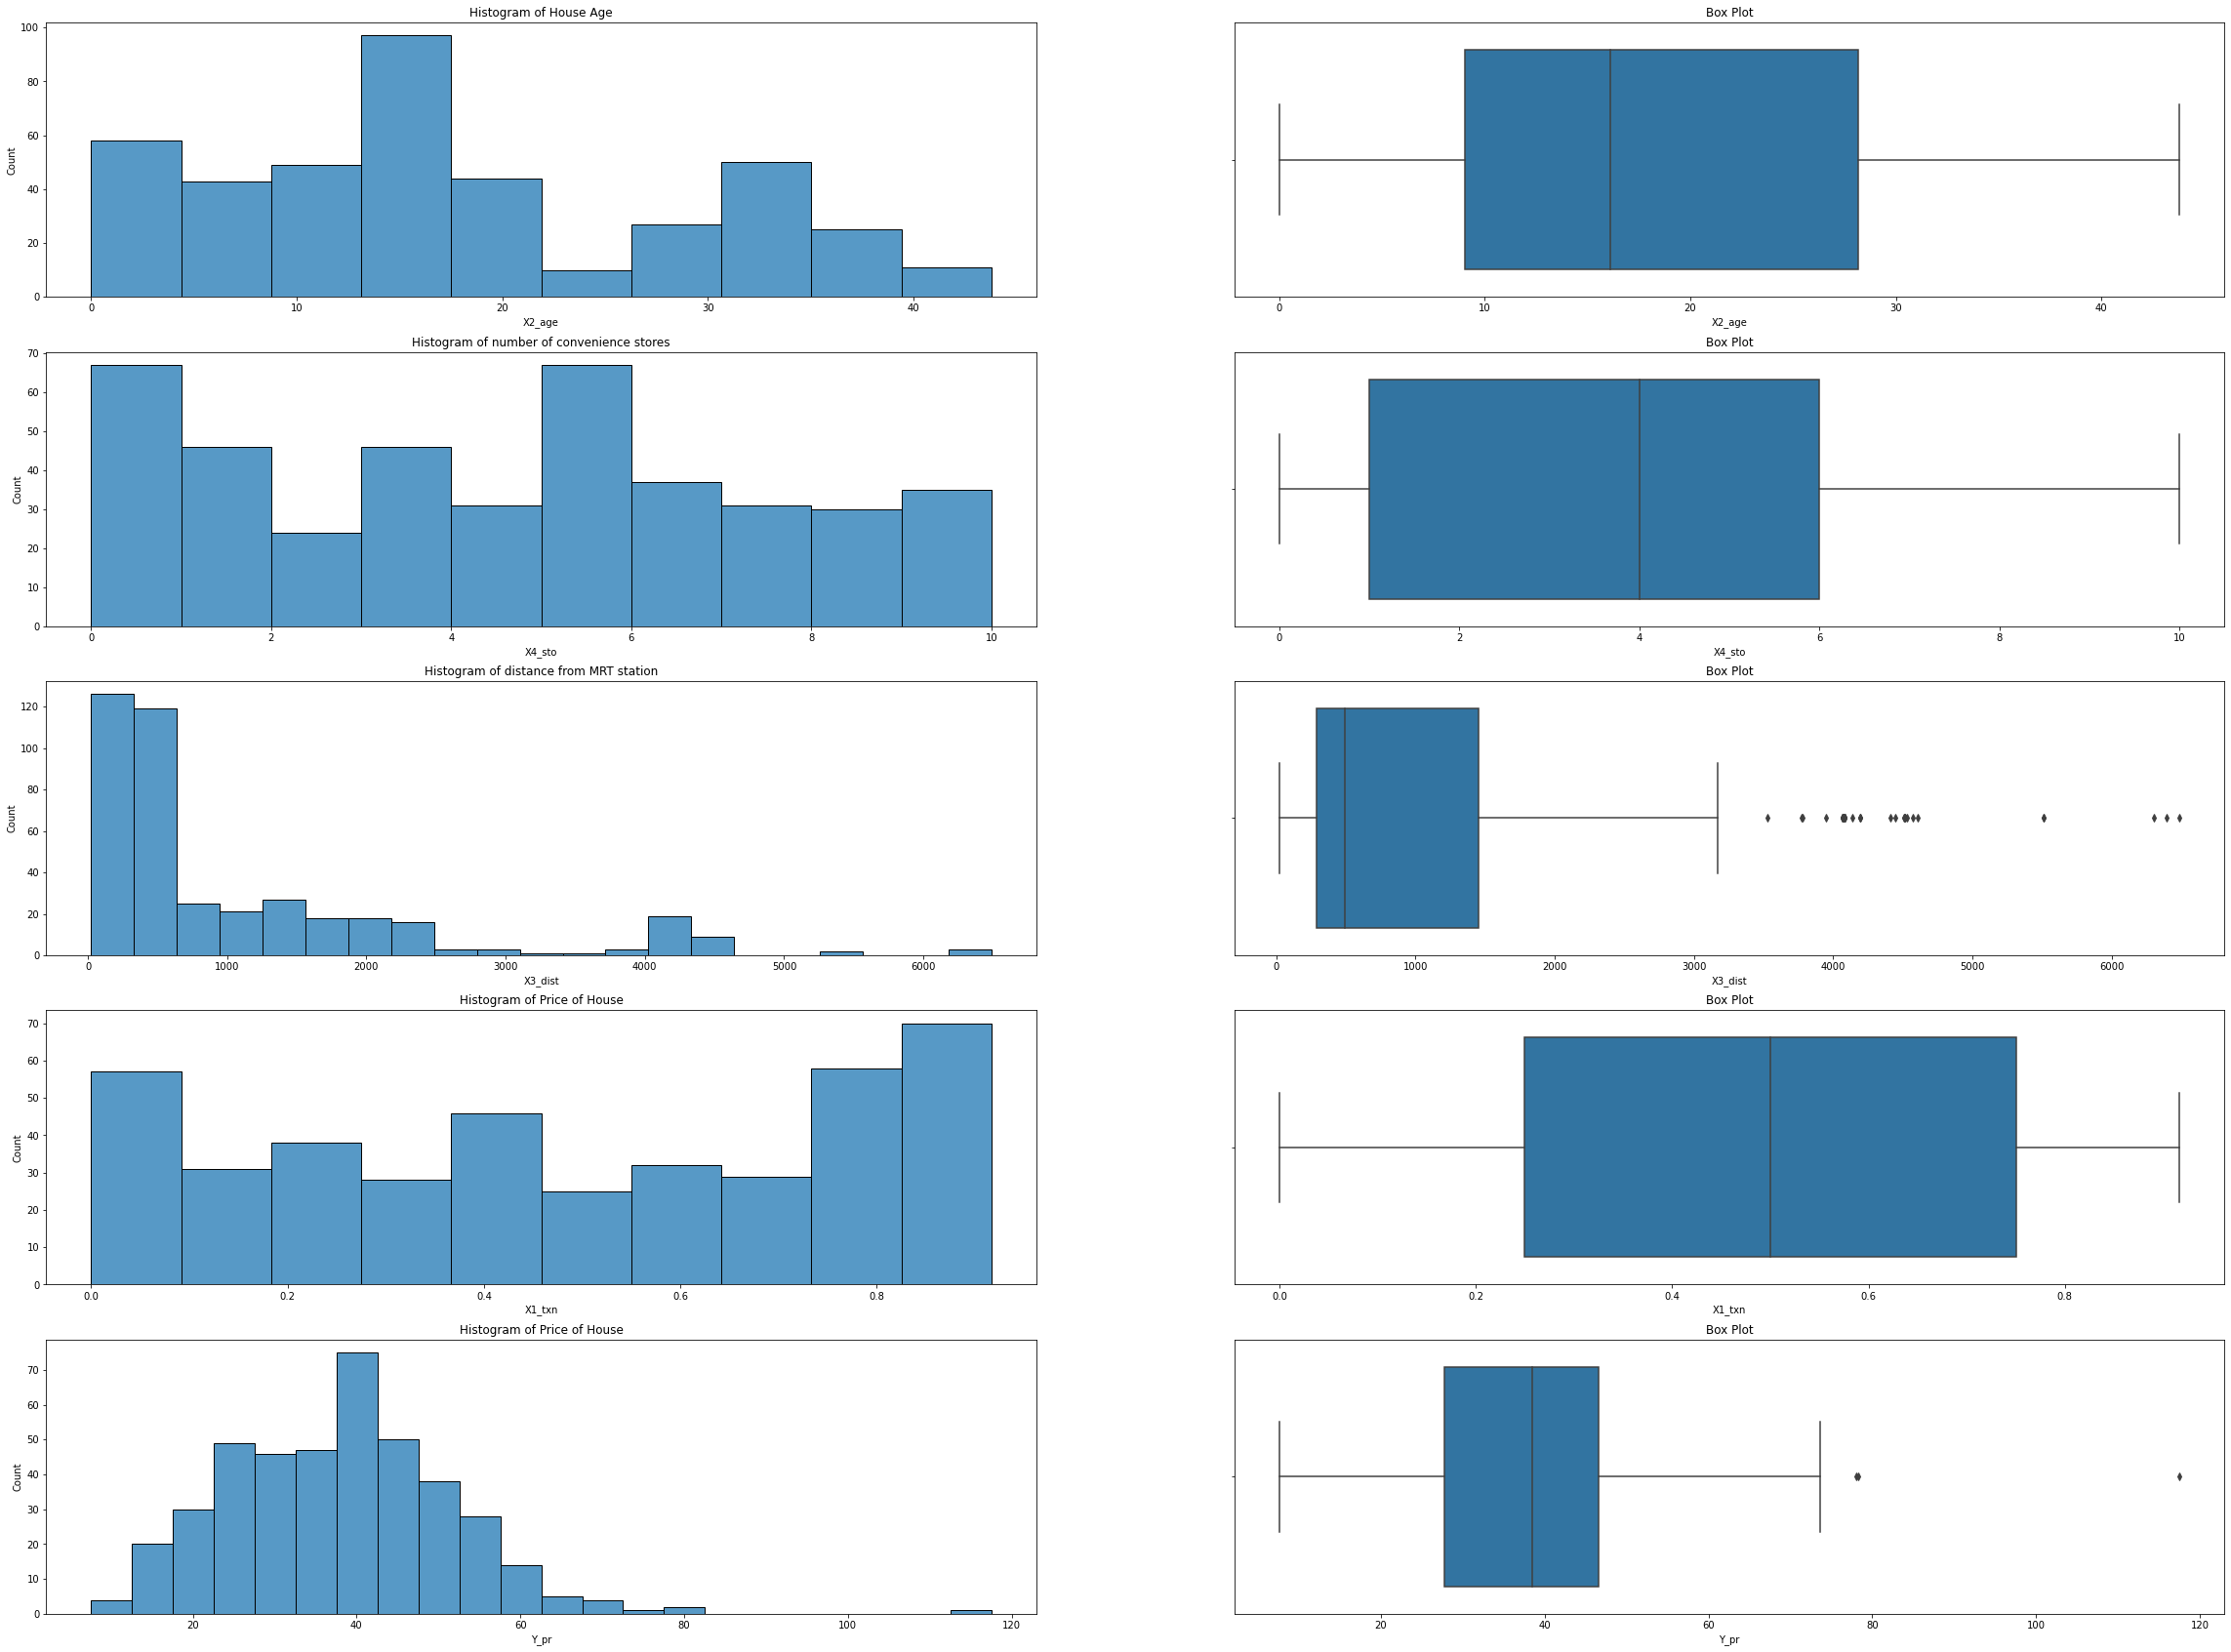

In [153]:
fig,axes = plt.subplots(5,2, figsize = (40,30))

# House Age
# Distribution plots
sns.histplot(df['X2_age'], ax = axes[0,0])
axes[0,0].set_title("Histogram of House Age")

# Box plot to detect outliers
sns.boxplot(x=df['X2_age'], ax = axes[0,1])
axes[0,1].set_title("Box Plot")

# Number of stores
# Distribution plots
sns.histplot(df['X4_sto'], ax = axes[1,0])
axes[1,0].set_title("Histogram of number of convenience stores")

# Box plot to detect outliers
sns.boxplot(x = df['X4_sto'], ax = axes[1,1])
axes[1,1].set_title("Box Plot")

# Distance from MRT station
# Distribution plots
sns.histplot(df['X3_dist'], ax = axes[2,0])
axes[2,0].set_title("Histogram of distance from MRT station")

# Box plot to detect outliers
sns.boxplot(x=df['X3_dist'], ax = axes[2,1])
axes[2,1].set_title("Box Plot")

# No. of house oldest to newest
# Distribution plots
sns.histplot(df['X1_txn'], ax = axes[3,0])
axes[3,0].set_title("Histogram of Price of House")

# Box plot to detect outliers
sns.boxplot(x=df['X1_txn'], ax = axes[3,1])
axes[3,1].set_title("Box Plot")

# Price of House
# Distribution plots
sns.histplot(df['Y_pr'], ax = axes[4,0])
axes[4,0].set_title("Histogram of Price of House")

# Box plot to detect outliers
sns.boxplot(x=df['Y_pr'], ax = axes[4,1])
axes[4,1].set_title("Box Plot")

plt.show()

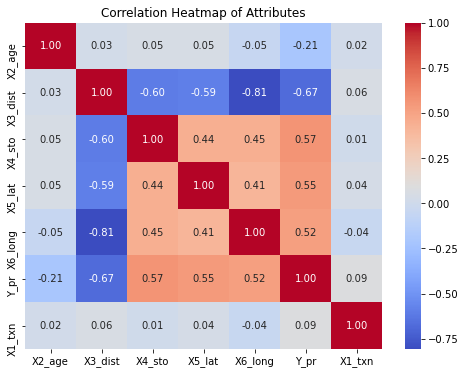

In [154]:
# Plotting the correlation Heat Map
# Making a new dataframe removing the 'No', 'Date' column
df2 = df.drop(columns=['No','X1_date'])

corr_matrix = df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap of Attributes")
plt.show()

# Fitting a Linear Regression model

In [155]:
# Defining dataframes for feature variable data(X) and target variable(y)
X = df[['X1_txn', 'X2_age','X3_dist','X4_sto','X5_lat','X6_long']]
y = df['Y_pr']

In [156]:
# Splitting the dataset into 2:1 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 45)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (276, 6)
Test Set Size: (138, 6)


In [157]:
# Scaling the feature variables
feature_scaler = MinMaxScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [158]:
# Training the model
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [172]:
# Predicting using the model on training data
y_pred_train = model.predict(X_train_scaled_df)

# Predicting using the model on test data
y_pred = model.predict(X_test_scaled_df)

In [174]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Mean Absolute Percentage Error (MAPE) on Test Dataset:", mape*100, "%")
print("Mean Absolute Percentage Error (MAPE) for Training Dataset:", mape_train*100, "%")

Mean Squared Error (MSE): 73.64061939819697
Mean Absolute Error (MAE): 6.3537609177131795
R-squared (R²): 0.5533908329392614
Mean Absolute Percentage Error (MAPE) on Test Dataset: 16.915105921480226 %
Mean Absolute Percentage Error (MAPE) for Training Dataset: 19.087750280180998 %


# Applying Lasso Regularization (L1 Regularization)

In [179]:
# Define multiple alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    
    # Initialize the Lasso model with the current alpha
    lasso_model = Lasso(alpha=alpha)
    
    # Fit the model on the scaled training data
    lasso_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test data
    y_pred = lasso_model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Alpha: {alpha}")
    print(f"  MSE: {mse:.4f}, R²: {r2:.4f}, MAPE: {mape:.4f}")

Alpha: 0.001
  MSE: 73.6234, R²: 0.5535, MAPE: 0.1691
Alpha: 0.01
  MSE: 73.5126, R²: 0.5542, MAPE: 0.1683
Alpha: 0.1
  MSE: 74.8851, R²: 0.5458, MAPE: 0.1685
Alpha: 1
  MSE: 110.8124, R²: 0.3280, MAPE: 0.2244
Alpha: 10
  MSE: 169.6347, R²: -0.0288, MAPE: 0.2967
Alpha: 100
  MSE: 169.6347, R²: -0.0288, MAPE: 0.2967


# Applying Ridge Regularization (L2 Regularization)

In [180]:
# Define multiple alpha values
alphas = [0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    
    # Initialize the Lasso model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    
    # Fit the model on the scaled training data
    ridge_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test data
    y_pred = ridge_model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Alpha: {alpha}")
    print(f"  MSE: {mse:.4f}, R²: {r2:.4f}, MAPE: {mape:.4f}")

Alpha: 0.01
  MSE: 73.6283, R²: 0.5535, MAPE: 0.1691
Alpha: 0.1
  MSE: 73.5432, R²: 0.5540, MAPE: 0.1686
Alpha: 1
  MSE: 73.7865, R²: 0.5525, MAPE: 0.1676
Alpha: 10
  MSE: 82.1503, R²: 0.5018, MAPE: 0.1793
Alpha: 100
  MSE: 130.2105, R²: 0.2103, MAPE: 0.2525


# Fitting a Polynomial Regression of degree d

## Checking for quadratic polynomial

In [181]:
# Defining a degree d
degree = 2

# Initialize PolynomialFeatures with degree d
poly = PolynomialFeatures(degree = degree)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on both train and test sets
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Degree: {degree}")
print(f"Training MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")

Degree: 2
Training MSE: 56.0004, R²: 0.7099
Test MSE: 61.4842, R²: 0.6271
Test MAPE: 16.34%


## Checking for cubic polynomial

In [182]:
# Defining a degree d
degree = 3

# Initialize PolynomialFeatures with degree d
poly = PolynomialFeatures(degree = degree)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on both train and test sets
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Degree: {degree}")
print(f"Training MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")

Degree: 3
Training MSE: 35.9979, R²: 0.8135
Test MSE: 87.9142, R²: 0.4668
Test MAPE: 18.72%


# Visualizations for the Model

## 1. Q-Q Plot

ValueError: x and y must be the same size

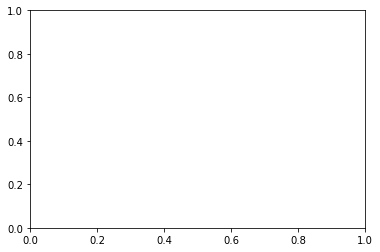

In [173]:
plt.scatter(X_train, y_pred, color='blue', edgecolor='k')
plt.scatter(X_train, y_train, color='red', edgecolor='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot")
plt.show()